In [ ]:
!pip install pandas matplotlib seaborn mplfinance scipy statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 702.4 kB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mplfinance.original_flavor import candlestick_ohlc
from matplotlib.dates import DateFormatter, WeekdayLocator, DayLocator, MONDAY
import numpy as np
from scipy.stats import pearsonr
import statsmodels.api as sm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
stock_new=pd.read_csv('/content/drive/MyDrive/ITC.BO.csv')
stock_new

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-03-22,300.000000,300.399994,296.299988,297.700012,293.392029,535677.0
1,2019-03-25,297.000000,297.000000,293.450012,295.200012,290.928192,282408.0
2,2019-03-26,295.000000,296.299988,291.200012,293.200012,288.957123,406096.0
3,2019-03-27,293.000000,296.350006,291.750000,293.000000,288.760010,416515.0
4,2019-03-28,294.950012,301.500000,293.149994,300.000000,295.658722,703876.0
...,...,...,...,...,...,...,...
1230,2024-03-14,422.399994,425.549988,418.000000,419.799988,419.799988,720374.0
1231,2024-03-15,418.850006,428.500000,415.600006,419.549988,419.549988,1973464.0
1232,2024-03-18,419.350006,420.700012,416.950012,417.399994,417.399994,1021092.0
1233,2024-03-19,417.600006,419.600006,408.750000,409.500000,409.500000,699406.0


In [ ]:


stock_new.dropna(axis=0, how='any', inplace=True)


In [ ]:
stock_new

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-03-22,300.000000,300.399994,296.299988,297.700012,293.392029,535677.0
1,2019-03-25,297.000000,297.000000,293.450012,295.200012,290.928192,282408.0
2,2019-03-26,295.000000,296.299988,291.200012,293.200012,288.957123,406096.0
3,2019-03-27,293.000000,296.350006,291.750000,293.000000,288.760010,416515.0
4,2019-03-28,294.950012,301.500000,293.149994,300.000000,295.658722,703876.0
...,...,...,...,...,...,...,...
1230,2024-03-14,422.399994,425.549988,418.000000,419.799988,419.799988,720374.0
1231,2024-03-15,418.850006,428.500000,415.600006,419.549988,419.549988,1973464.0
1232,2024-03-18,419.350006,420.700012,416.950012,417.399994,417.399994,1021092.0
1233,2024-03-19,417.600006,419.600006,408.750000,409.500000,409.500000,699406.0


In [ ]:


stock_new.isnull().sum()


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

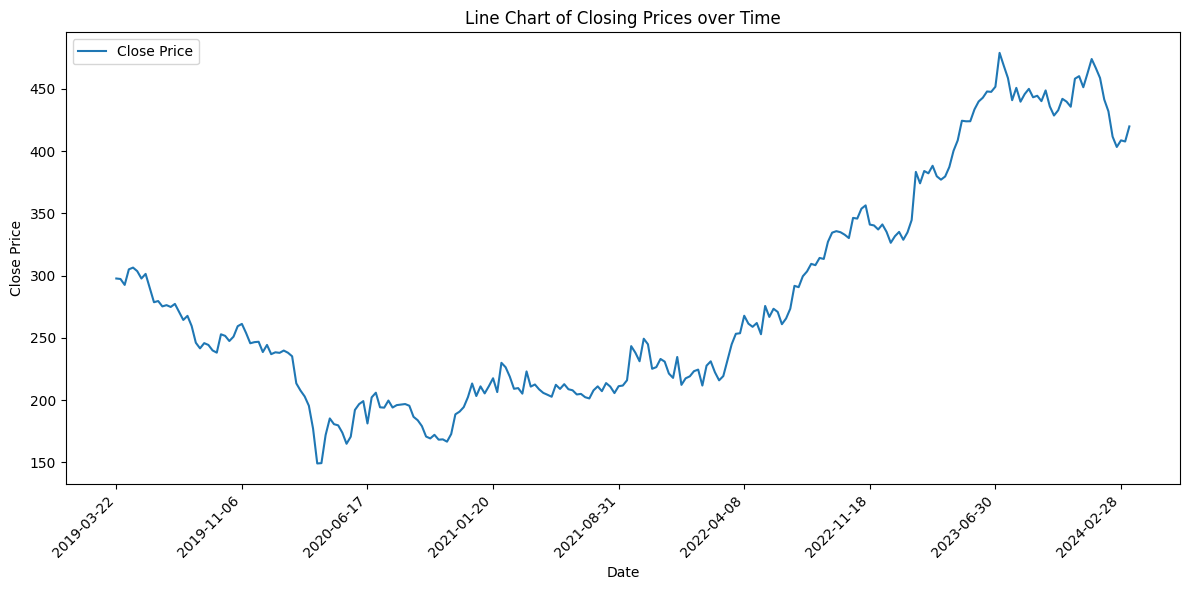

In [ ]:
import matplotlib.pyplot as plt


n = 5
stock_new_downsampled = stock_new.iloc[::n]

plt.figure(figsize=(12, 6))
plt.plot(stock_new_downsampled['Date'], stock_new_downsampled['Close'], label='Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Line Chart of Closing Prices over Time')
plt.legend()

# Rotate and format x-axis date labels
plt.xticks(rotation=45, ha='right')
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))

plt.tight_layout()
plt.show()


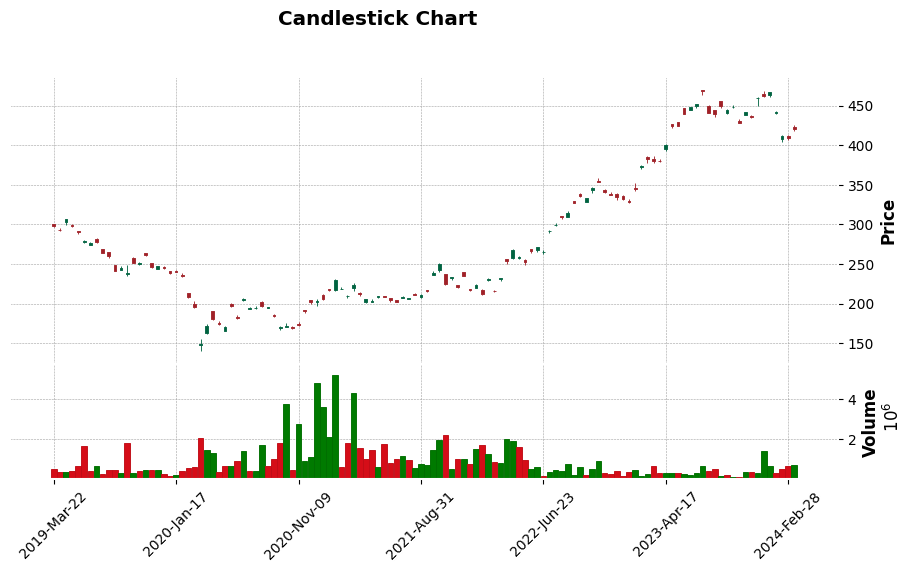

In [ ]:
import pandas as pd
import mplfinance as mpf


stock_new['Date'] = pd.to_datetime(stock_new['Date'])

stock_new = stock_new.sort_values(by='Date')


interval = 10


stock_downsampled = stock_new.iloc[::interval]


mpf.plot(stock_downsampled.set_index('Date'),
         type='candle',
         style='charles',
         title='Candlestick Chart',
         ylabel='Price',
         ylabel_lower='Volume',
         volume=True,
         figratio=(16, 8),
         figscale=1.0)


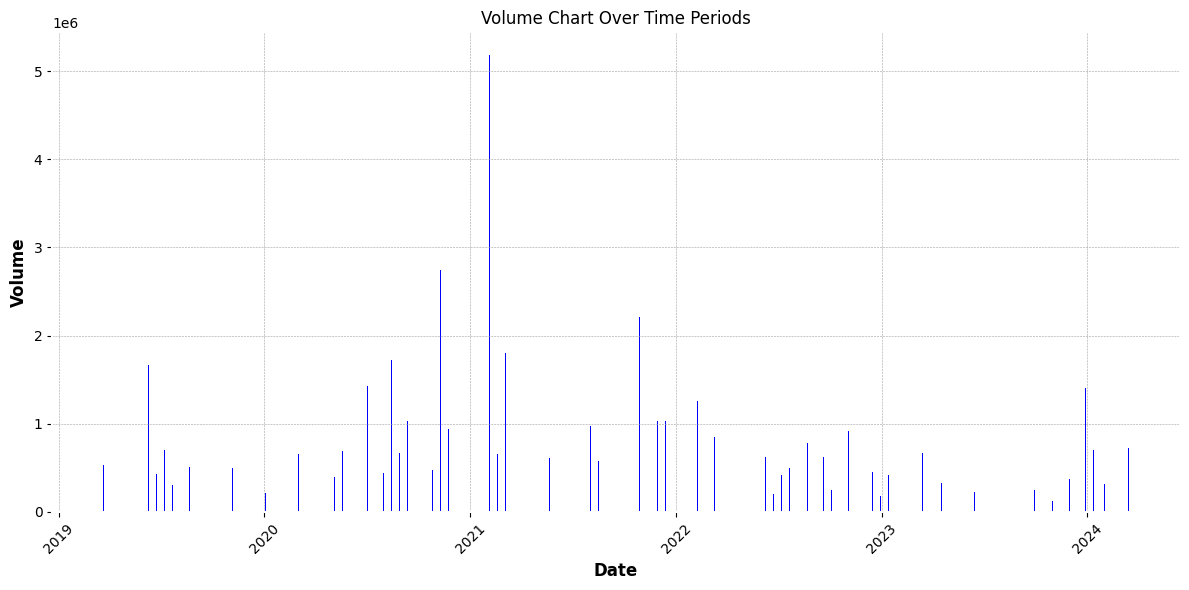

In [ ]:
import matplotlib.pyplot as plt


n = 10
stock_new_downsampled = stock_new.iloc[::n]

plt.figure(figsize=(12, 6))
plt.bar(stock_new_downsampled['Date'], stock_new_downsampled['Volume'], color='blue')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Volume Chart Over Time Periods')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-11-4fcff4249235>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_new_downsampled['MA50'] = stock_new_downsampled['Close'].rolling(window=50).mean()
<ipython-input-11-4fcff4249235>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_new_downsampled['MA100'] = stock_new_downsampled['Close'].rolling(window=100).mean()
<ipython-input-11-4fcff4249235>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

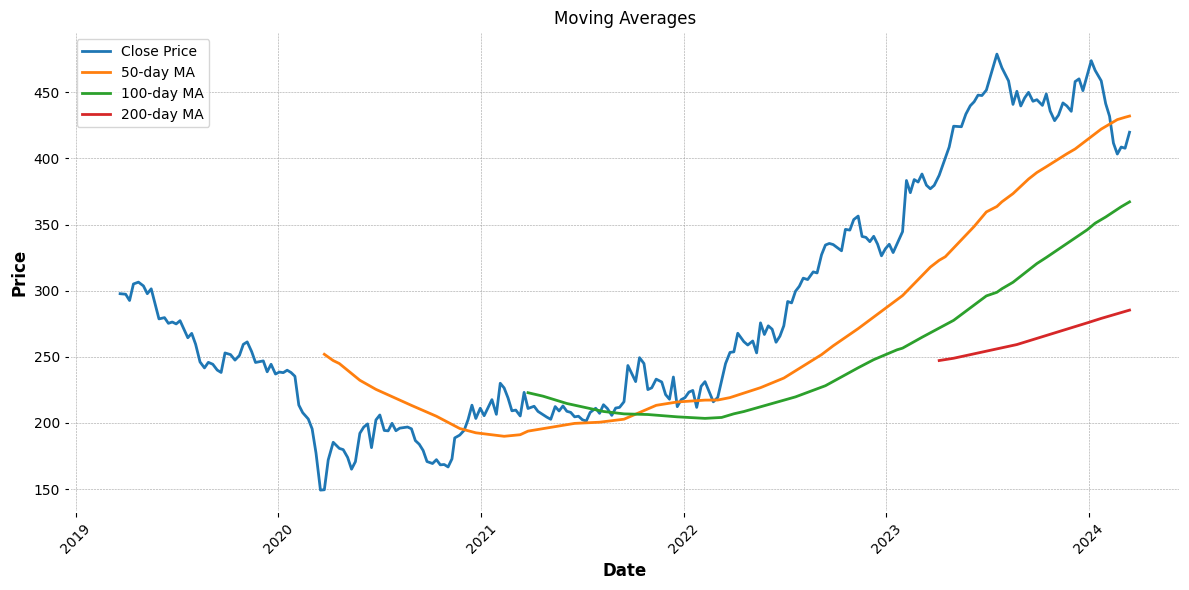

In [ ]:
import matplotlib.pyplot as plt


n = 5
stock_new_downsampled = stock_new.iloc[::n]


stock_new_downsampled['MA50'] = stock_new_downsampled['Close'].rolling(window=50).mean()
stock_new_downsampled['MA100'] = stock_new_downsampled['Close'].rolling(window=100).mean()
stock_new_downsampled['MA200'] = stock_new_downsampled['Close'].rolling(window=200).mean()


plt.figure(figsize=(12, 6))


plt.plot(stock_new_downsampled['Date'], stock_new_downsampled['Close'], label='Close Price')


plt.plot(stock_new_downsampled['Date'], stock_new_downsampled['MA50'], label='50-day MA')
plt.plot(stock_new_downsampled['Date'], stock_new_downsampled['MA100'], label='100-day MA')
plt.plot(stock_new_downsampled['Date'], stock_new_downsampled['MA200'], label='200-day MA')


plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Moving Averages')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
pip install ta


  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29411 sha256=8eb72adfbbc35034f690ec0e9afd54c1760e782e0d377395e9f51250060984d0
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


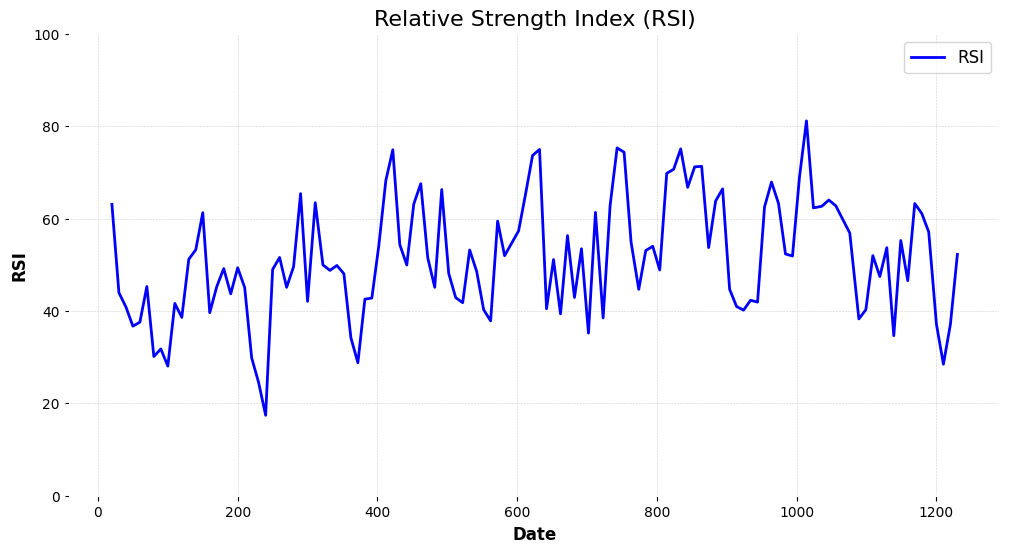

In [ ]:
import matplotlib.pyplot as plt
import ta


stock_new['RSI'] = ta.momentum.rsi(close=stock_new['Close'], window=14)


n = 10
stock_new_downsampled = stock_new.iloc[::n]


plt.figure(figsize=(12, 6))


plt.plot(stock_new_downsampled.index, stock_new_downsampled['RSI'], label='RSI', color='blue', linestyle='-', linewidth=2)


plt.title('Relative Strength Index (RSI)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('RSI', fontsize=12)
plt.legend(fontsize=12)


plt.ylim(0, 100)
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()


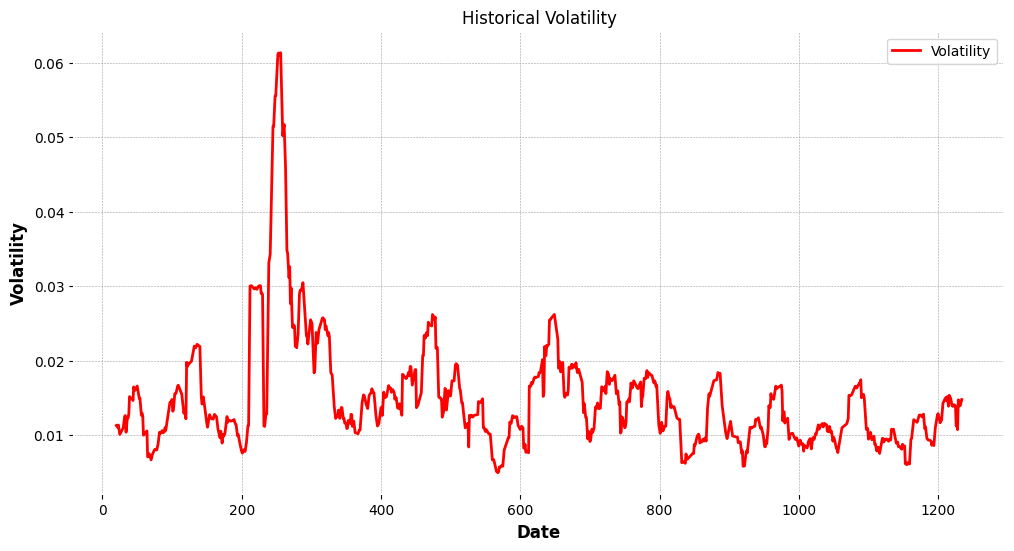

In [ ]:

volatility = stock_new['Close'].pct_change().rolling(window=20).std()
plt.figure(figsize=(12, 6))
plt.plot(volatility.index, volatility, label='Volatility', color='red')
plt.title('Historical Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()


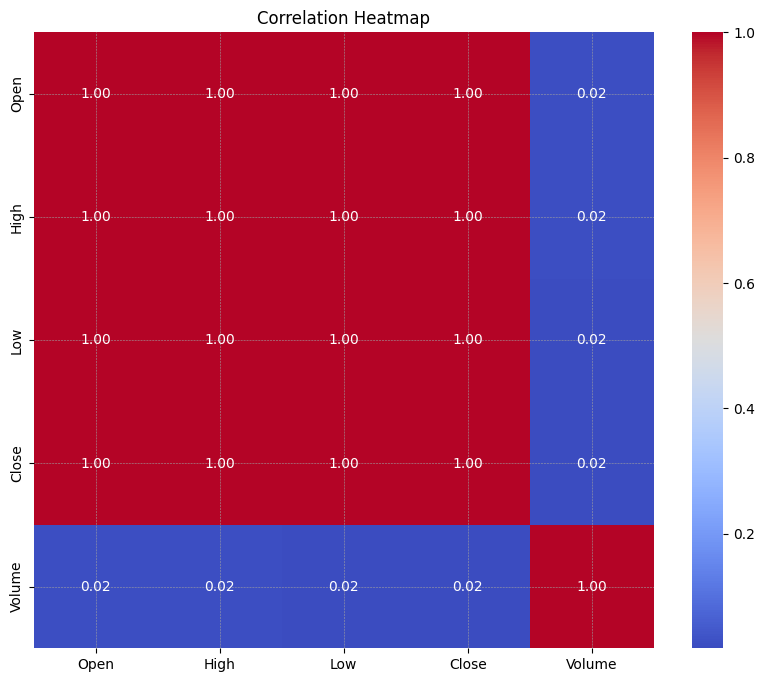

In [ ]:
correlation_matrix = stock_new[['Open', 'High', 'Low', 'Close', 'Volume']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

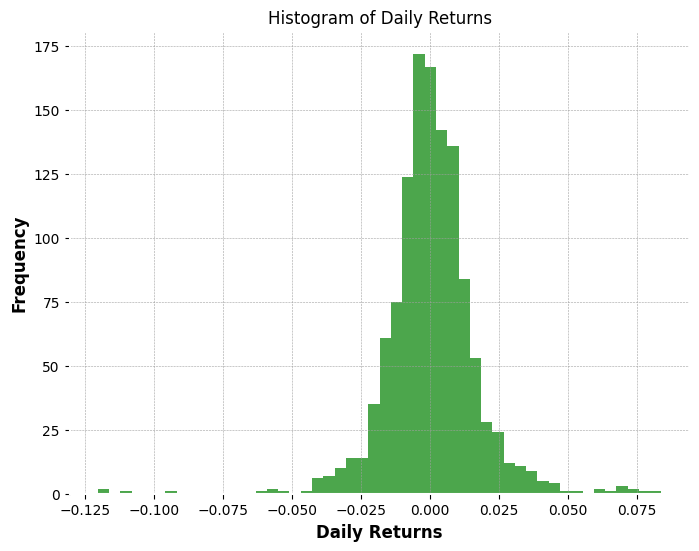

In [ ]:
returns = stock_new['Close'].pct_change()
plt.figure(figsize=(8, 6))
plt.hist(returns.dropna(), bins=50, color='green', alpha=0.7)
plt.title('Histogram of Daily Returns')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.show()

<Figure size 1000x600 with 0 Axes>

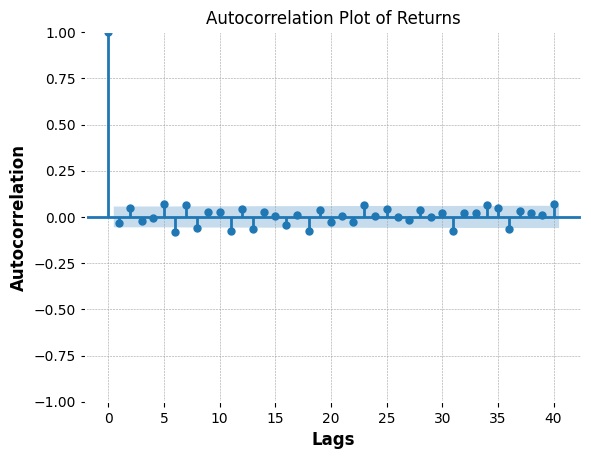

In [ ]:
plt.figure(figsize=(10, 6))
sm.graphics.tsa.plot_acf(returns.dropna(), lags=40)
plt.title('Autocorrelation Plot of Returns')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.show()

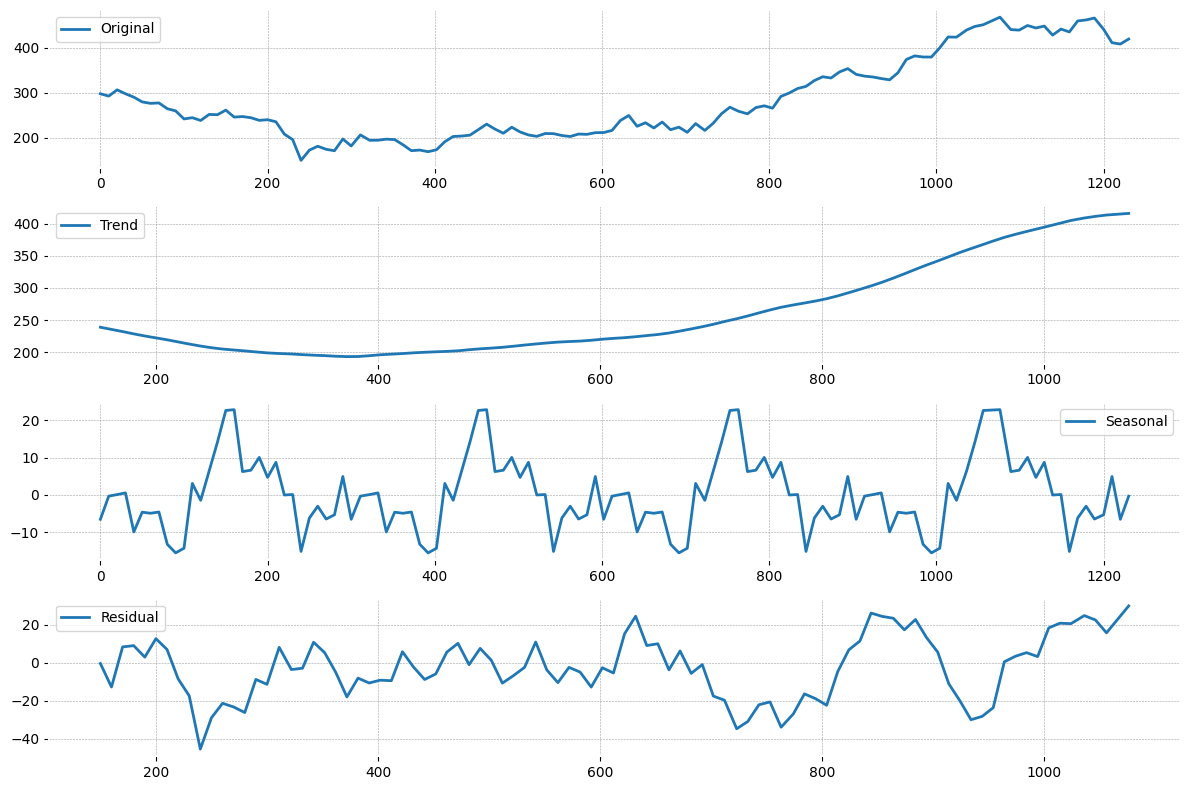

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt


n = 10
stock_new_downsampled = stock_new.iloc[::n]


decomposition = sm.tsa.seasonal_decompose(stock_new_downsampled['Close'], model='additive', period=30)  # assuming a seasonal period of 30 days

plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(stock_new_downsampled.index, stock_new_downsampled['Close'], label='Original')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(stock_new_downsampled.index, decomposition.trend, label='Trend')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(stock_new_downsampled.index, decomposition.seasonal, label='Seasonal')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(stock_new_downsampled.index, decomposition.resid, label='Residual')
plt.legend()

plt.tight_layout()
plt.show()


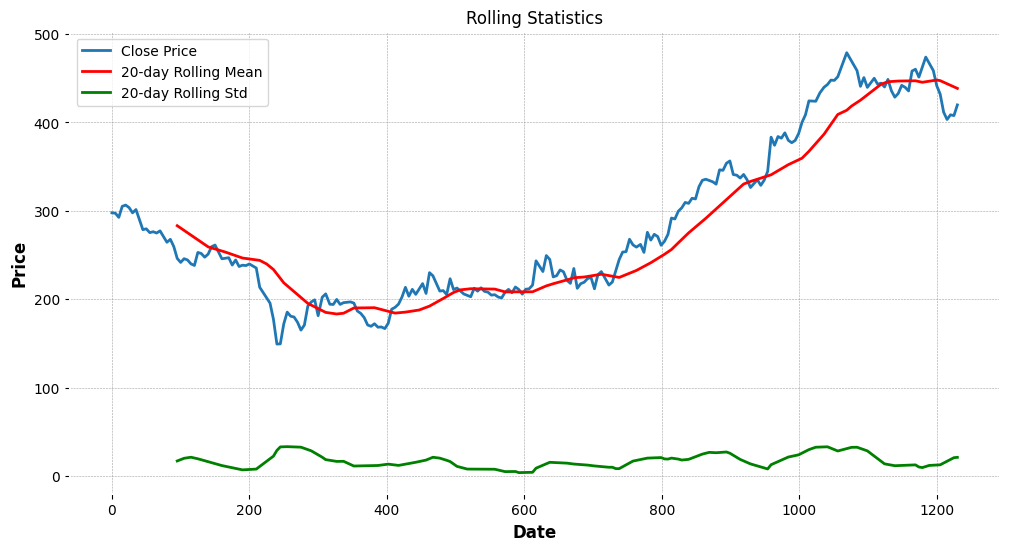

In [ ]:
import matplotlib.pyplot as plt


n = 5
stock_new_downsampled = stock_new.iloc[::n]


rolling_mean = stock_new_downsampled['Close'].rolling(window=20).mean()
rolling_std = stock_new_downsampled['Close'].rolling(window=20).std()

plt.figure(figsize=(12, 6))

plt.plot(stock_new_downsampled.index, stock_new_downsampled['Close'], label='Close Price')
plt.plot(stock_new_downsampled.index, rolling_mean, label='20-day Rolling Mean', color='red')
plt.plot(stock_new_downsampled.index, rolling_std, label='20-day Rolling Std', color='green')

plt.title('Rolling Statistics')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


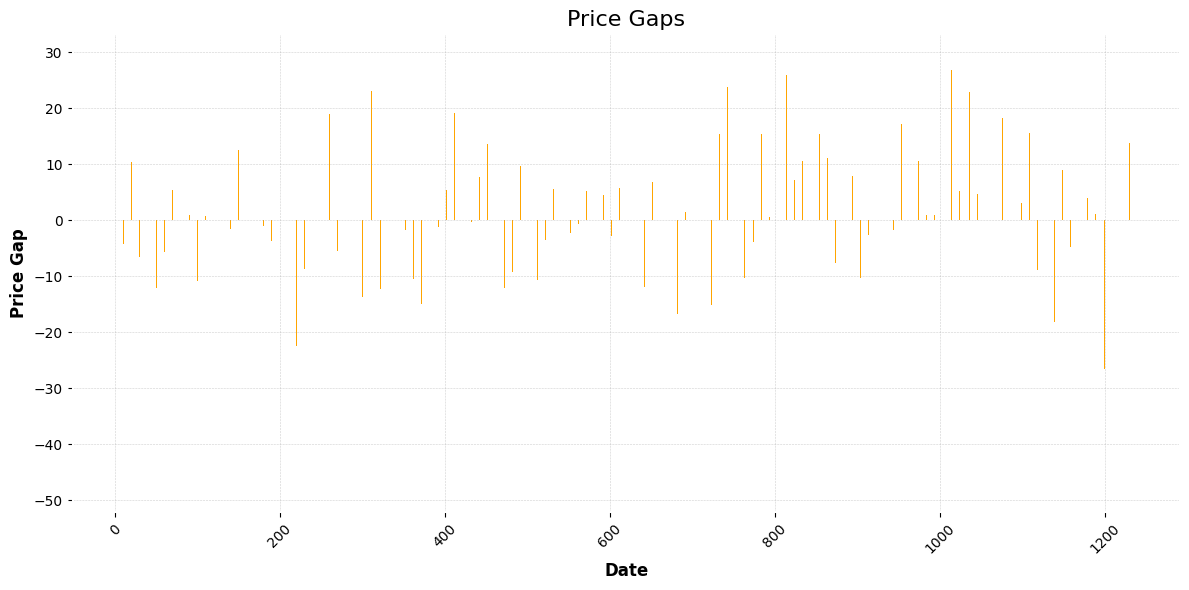

In [ ]:
import matplotlib.pyplot as plt


n = 10
stock_new_downsampled = stock_new.iloc[::n]


gaps = stock_new_downsampled['Open'] - stock_new_downsampled['Close'].shift(1)


plt.figure(figsize=(12, 6))  # Adjust figure size
plt.bar(stock_new_downsampled.index, gaps, color='orange')
plt.title('Price Gaps', fontsize=16)  # Increase title font size
plt.xlabel('Date', fontsize=12)  # Increase x-axis label font size
plt.ylabel('Price Gap', fontsize=12)  # Increase y-axis label font size
plt.xticks(rotation=45)  # Rotate x-axis tick labels for better readability
plt.grid(True, linestyle='--', alpha=0.5)  # Add gridlines with dashed style and lower transparency
plt.tight_layout()  # Adjust layout to prevent overlap of labels

plt.show()


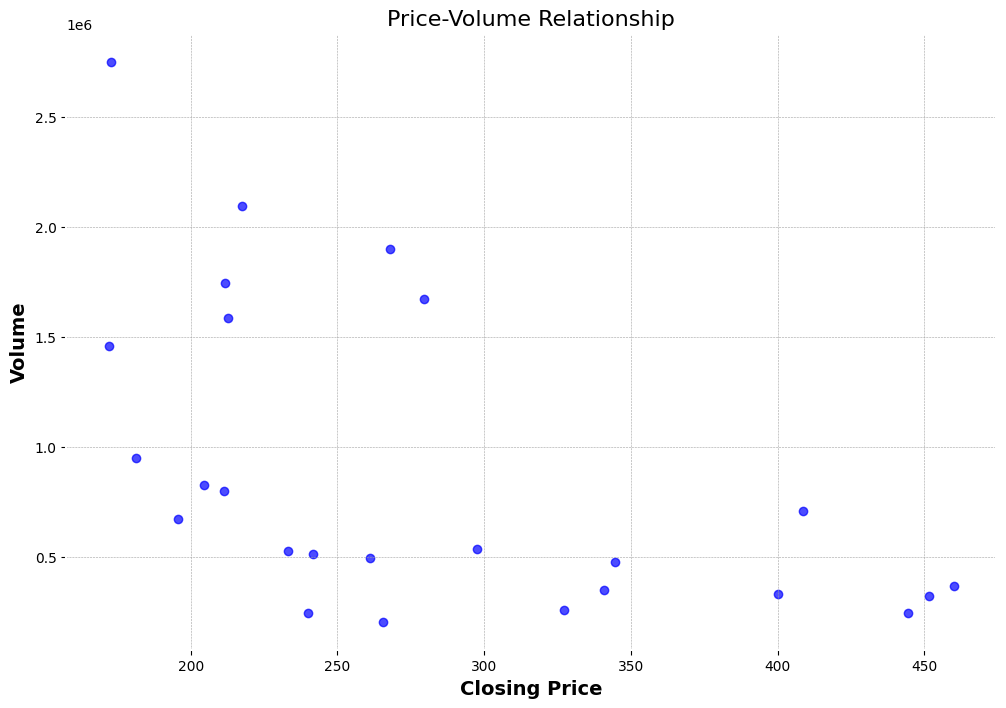

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
n = 50
plt.scatter(stock_new['Close'][::n], stock_new['Volume'][::n], color='blue', alpha=0.7)
plt.title('Price-Volume Relationship', fontsize=16)
plt.xlabel('Closing Price', fontsize=14)
plt.ylabel('Volume', fontsize=14)
plt.show()


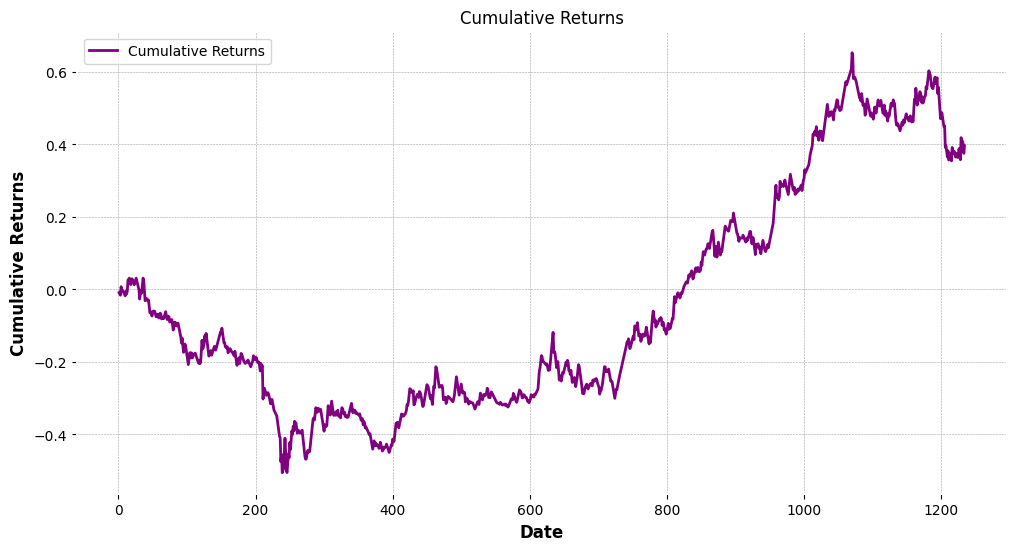

In [ ]:

cumulative_returns = (1 + returns).cumprod() - 1
plt.figure(figsize=(12, 6))
plt.plot(cumulative_returns.index, cumulative_returns, label='Cumulative Returns', color='purple')
plt.title('Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()
